In [ ]:
# Matteo's version of the plotting
reload(do)
dt=1e-2
import matplotlib.animation as animation
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 1000)
line, = ax.plot(system.grid, do.eval_one_body_density(system, nparticles, C0).real)
integrator = scipy.integrate.ode(rhs.f).set_integrator('zvode')
integrator.set_initial_value( np.reshape(C0, len(C0)**2 ), 0)
ani = animation.FuncAnimation(fig, do.animation, fargs=(line, system, dt, t_max, C0, omega, epsilon0, nparticles, integrator), interval=200, blit=True, save_count=1000)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg, scipy.integrate
import do2
from importlib import reload
from IPython.display import display, clear_output
from quantum_systems import ODQD, GeneralOrbitalSystem

In [ ]:
### PARAMETERS ###
l = 10 # Number of eigenstates of the HO potential --> we use these functions to generate the single particle WF
grid_length = 10  # The width of the one-dimensional grid
num_grid_points = 201  # The number of discretized points on the grid.
# More points give better results for the single-particle basis at the cost of slower setup.
alpha = 1  # The strength of the Coulomb interaction 
a = 0.25  # The shielding parameter in the Coulomb interaction potential
Omega = 0.25  # The frequency of the harmonic oscillator trap
omega = 8*Omega # frequency of the laser field
epsilon0 = 1.0 # amplitude of the laser field
potential=ODQD.HOPotential(Omega)
nparticles = 2

In [ ]:
reload(do2)
dt = 1e-3
T = 8*2*np.pi/omega
ghf = do2.GHF(Omega=Omega, omega=omega, epsilon0=epsilon0)
epsilon, C0 = ghf.solve_TIHF(tolerance=1e-6, max_iter=100, energy_per_step_ON=False)
C_on, time_on, dipole_on = ghf.solve_TDHF(tstart=0, dt=dt, t_max= T, C0=C0, eval_overlap=False, eval_dipole=True, laser_ON=True)

C_off, time_off, dipole_off = ghf.solve_TDHF(tstart=T, dt=dt, t_max=51*2*np.pi/omega, C0=C_on, eval_overlap=False, eval_dipole=True, laser_ON=False)

ghf.plot_dipole(np.concatenate((time_on, time_off)), np.concatenate((dipole_on, dipole_off)))

In [ ]:
signalFFT = np.fft.fft(dipole_off)
freqFFT = np.fft.fftfreq(len(signalFFT), dt)

plt.figure(figsize=(8,5))
plt.plot(freqFFT*2*np.pi, np.abs(signalFFT))
plt.xlabel('$\omega$')
plt.ylabel('fft')
plt.xlim([0,2])
plt.grid()

(1.1795712863264844+0j)
(1.180534598313573-1.8465318250143747e-18j)
(1.1805325131750815-8.668196369021608e-17j)


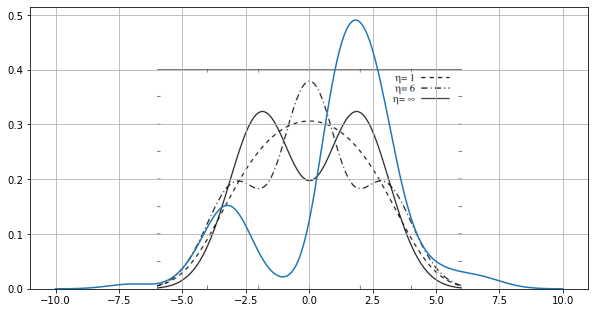

array([0.00000000e+00+0.00000000e+00j, 5.20324370e-06+8.60267837e-23j,
       2.11589834e-05-3.97046694e-22j, 4.88501426e-05+5.82335151e-22j,
       8.98247633e-05+3.38813179e-21j, 1.46142858e-04+1.69406589e-21j,
       2.20328274e-04+7.62329653e-21j, 3.15314189e-04-1.05879118e-20j,
       4.34372432e-04+5.84452734e-20j, 5.81018195e-04+2.96461532e-20j,
       7.58883192e-04-3.30342849e-20j, 9.71552255e-04-2.37169225e-20j,
       1.22236086e-03-9.99498878e-20j, 1.51415442e-03-1.35525272e-20j,
       1.84901422e-03+4.23516474e-20j, 2.22795973e-03+1.69406589e-20j,
       2.65064237e-03+7.45388994e-20j, 3.11505109e-03-5.42101086e-20j,
       3.61725562e-03-6.77626358e-20j, 4.15121691e-03-3.72694497e-20j,
       4.70869702e-03+2.27004830e-19j, 5.27930062e-03+6.20028117e-19j,
       5.85067690e-03-4.37069001e-19j, 6.40890423e-03-8.80914265e-20j,
       6.93906892e-03+2.43945489e-19j, 7.42603564e-03-4.33680869e-19j,
       7.85538940e-03+4.30292737e-19j, 8.21451086e-03+2.20228566e-19j,
      

In [19]:
print(ghf.evaluate_total_energy(C0))
print(ghf.evaluate_total_energy(C_on))
print(ghf.evaluate_total_energy(C_off))
ghf.eval_one_body_density(C_off, plot_ON=True)